In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
engine = create_engine("sqlite:///../found_objects.db")

In [3]:
connection = engine.connect()

In [ ]:
# Import des données au format dataframe

In [15]:
df_objects = pd.read_sql('SELECT * FROM Objects', connection).drop("id", axis=1)

In [16]:
df_objects.head(2)

,date,restitution_date,gare,nature,type,nom
0,2016-12-31T17:49:05+00:00,None,Lille Europe,Chéquier,"Porte-monnaie / portefeuille, argent, titres",Objet trouvé
1,2016-12-31T16:09:12+00:00,None,Lille Europe,"Tablette tactile protégée (étui, housse)","Appareils électroniques, informatiques, appare...",Objet trouvé


In [ ]:
# Conversion du champ date de texte vers date

In [20]:
df_objects["date"] = df_objects["date"].apply(lambda x: x[:10])
df_objects["date"] = pd.to_datetime(df_objects["date"])

In [22]:
df_objects.dtypes

date                datetime64[ns]
restitution_date            object
gare                        object
nature                      object
type                        object
nom                         object
dtype: object

In [ ]:
# Creation des champs en rapport avec la date

In [35]:
df_objects["year"] = df_objects["date"].dt.year
df_objects["month"] = df_objects["date"].dt.month
df_objects["week"] = df_objects["date"].dt.week
df_objects["day"] = df_objects["date"].dt.day
df_objects["day_of_week"] = df_objects["date"].dt.day_of_week.map({0:"Lundi", 1: "Mardi", 2: "Mercredi",
                                                                   3: "Jeudi", 4: "Vendredi",
                                                                   5: "Samedi", 6: "Dimanche"})

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_12972\1557196244.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_objects["week"] = df_objects["date"].dt.week


In [44]:
# Creation d'une colonne pour les moyenes

In [45]:
df_objects["number"] = 1

In [46]:
df_objects

,date,restitution_date,gare,nature,type,nom,year,month,day,day_of_week,week,number
0,2016-12-31,None,Lille Europe,Chéquier,"Porte-monnaie / portefeuille, argent, titres",Objet trouvé,2016,12,31,Samedi,52,1
1,2016-12-31,None,Lille Europe,"Tablette tactile protégée (étui, housse)","Appareils électroniques, informatiques, appare...",Objet trouvé,2016,12,31,Samedi,52,1
2,2016-12-31,None,Lille Europe,Carte Vitale,Pièces d'identités et papiers personnels,Objet trouvé,2016,12,31,Samedi,52,1
3,2016-12-31,2017-01-02T10:20:06+00:00,Lille Europe,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Objet trouvé,2016,12,31,Samedi,52,1
4,2016-12-31,2017-01-23T12:03:06+00:00,Lille Europe,Sac à main,"Bagagerie: sacs, valises, cartables",Objet trouvé,2016,12,31,Samedi,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22201,2023-01-02,None,Lille Europe,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Objet trouvé,2023,1,2,Lundi,1,1
22202,2023-01-01,None,Lille Europe,"Carte d'identité, passeport, permis de conduire",Pièces d'identités et papiers personnels,Objet trouvé,2023,1,1,Dimanche,52,1
22203,2023-01-01,None,Lille Europe,"AirPod, casque audio, écouteurs","Appareils électroniques, informatiques, appare...",Objet trouvé,2023,1,1,Dimanche,52,1
22204,2023-01-01,2023-01-01T07:11:10+00:00,Lille Europe,Sac à main,"Bagagerie: sacs, valises, cartables",Objet trouvé,2023,1,1,Dimanche,52,1


In [27]:
# Analyse des données

In [52]:
nombre_par_année = df_objects[["number","year"]].groupby("year").sum().reset_index()
nombre_par_année

,year,number
0,2016,4131
1,2017,4614
2,2018,4364
3,2019,3005
4,2020,1526
5,2021,1915
6,2022,2645
7,2023,6


In [50]:
nombre_par_mois = df_objects[["number","month"]].groupby("month").sum().reset_index()
nombre_par_mois

,month,number
0,1,1839
1,2,1740
2,3,1690
3,4,1543
4,5,1701
5,6,1992
6,7,2121
7,8,1870
8,9,2113
9,10,2103


In [51]:
nombre_par_semaine = df_objects[["number","week"]].groupby("week").sum().reset_index()
nombre_par_semaine

,week,number
0,1,411
1,2,405
2,3,412
3,4,412
4,5,445
5,6,437
6,7,433
7,8,433
8,9,400
9,10,431


In [53]:
nombre_par_jours = df_objects[["number","day", "month"]].groupby(["month", "day"]).sum().reset_index()
nombre_par_jours

,month,day,number
0,1,1,44
1,1,2,68
2,1,3,85
3,1,4,71
4,1,5,43
...,...,...,...
361,12,27,56
362,12,28,43
363,12,29,60
364,12,30,53


In [54]:
moyenne_par_mois = df_objects[["number","year", "month"]].groupby(["year", "month"]).sum().reset_index()
moyenne_par_mois = moyenne_par_mois[["number", "month"]].groupby("month").mean().reset_index()
moyenne_par_mois

,month,number
0,1,229.875000
1,2,248.571429
2,3,241.428571
3,4,257.166667
4,5,243.000000
5,6,284.571429
6,7,303.000000
7,8,267.142857
8,9,301.857143
9,10,300.428571


In [58]:
moyenne_par_jour_semaine = df_objects[["number","year", "week", "day_of_week"]].groupby(["year", "week", "day_of_week"]).sum().reset_index()
moyenne_par_jour_semaine = moyenne_par_jour_semaine[["number", "day_of_week"]].groupby("day_of_week").mean().reset_index()
moyenne_par_jour_semaine

,day_of_week,number
0,Dimanche,7.251445
1,Jeudi,9.461972
2,Lundi,11.243697
3,Mardi,8.988506
4,Mercredi,8.367816
5,Samedi,8.971014
6,Vendredi,9.190202


In [59]:
# Boxplot par année et par mois

In [60]:
import seaborn as sns

<AxesSubplot: xlabel='year', ylabel='month'>

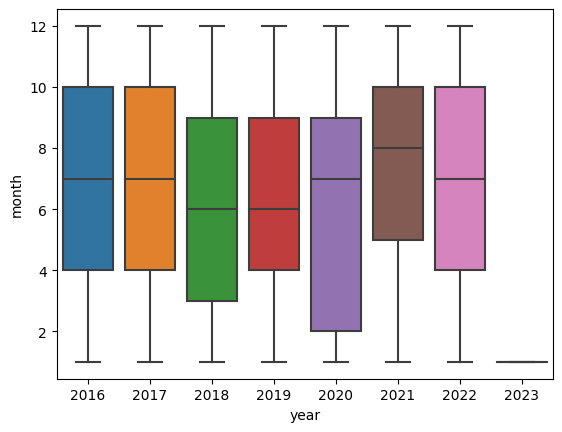

In [65]:
sns.boxplot(data=df_objects, x="year", y="month")